# Understanding and Predicting IBM Employee Atrition

## Table of Contents
### Define the Problem
### Discover
### Develop
### Deploy

# 1. Define the Problem
# Objective
- Why employee attrition a issue
- Uncover factors that lead to the most employee attrition
- Perform EDA for any meaningful patterns
- Create models

Attrition is one of the most common issues at any organization. The amount of  time, money and effort to train new employees can lead to great loss for the company. The loss cost include on-boarding, advertising, hiring, training and lost productivity. Additionally, attrition causes doubt or distrust among current employees with the management. 
According to the Gallup, U.S business lose a trillion every year due to employee turnover. https://www.gallup.com/workplace/247391/fixable-problem-costs-businesses-trillion.aspx. It also argues that problem is fixable with right strategy and retention plan. 

This project provides in-depth analysis of factors that lead to employee turnover, create model and provide retention strategy using **kaggle** IBM HR dataset.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset


# 2. Discover

## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

## Obtain data

In [ ]:
ibm = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Clean data

In [ ]:
# dimension of data set
ibm.shape

(1470, 35)

In [ ]:
# see if there are any missing values
ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# confirmation check for any missing or null values
ibm.isnull().values.any()

False

In [ ]:
# see records and data types
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# check for duplicates
ibm.duplicated().sum()

0

## Explore data

**Numerical Features**

In [ ]:
# statistical summary
ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# overview of employees who left vs remained at the compnay
attr_summary = ibm.groupby('Attrition')
attr_summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Glancing quickly, it appears turnover rate is affected by Job Level, Monthly Income, Total working years, years at company & current job, time with current manager. 

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

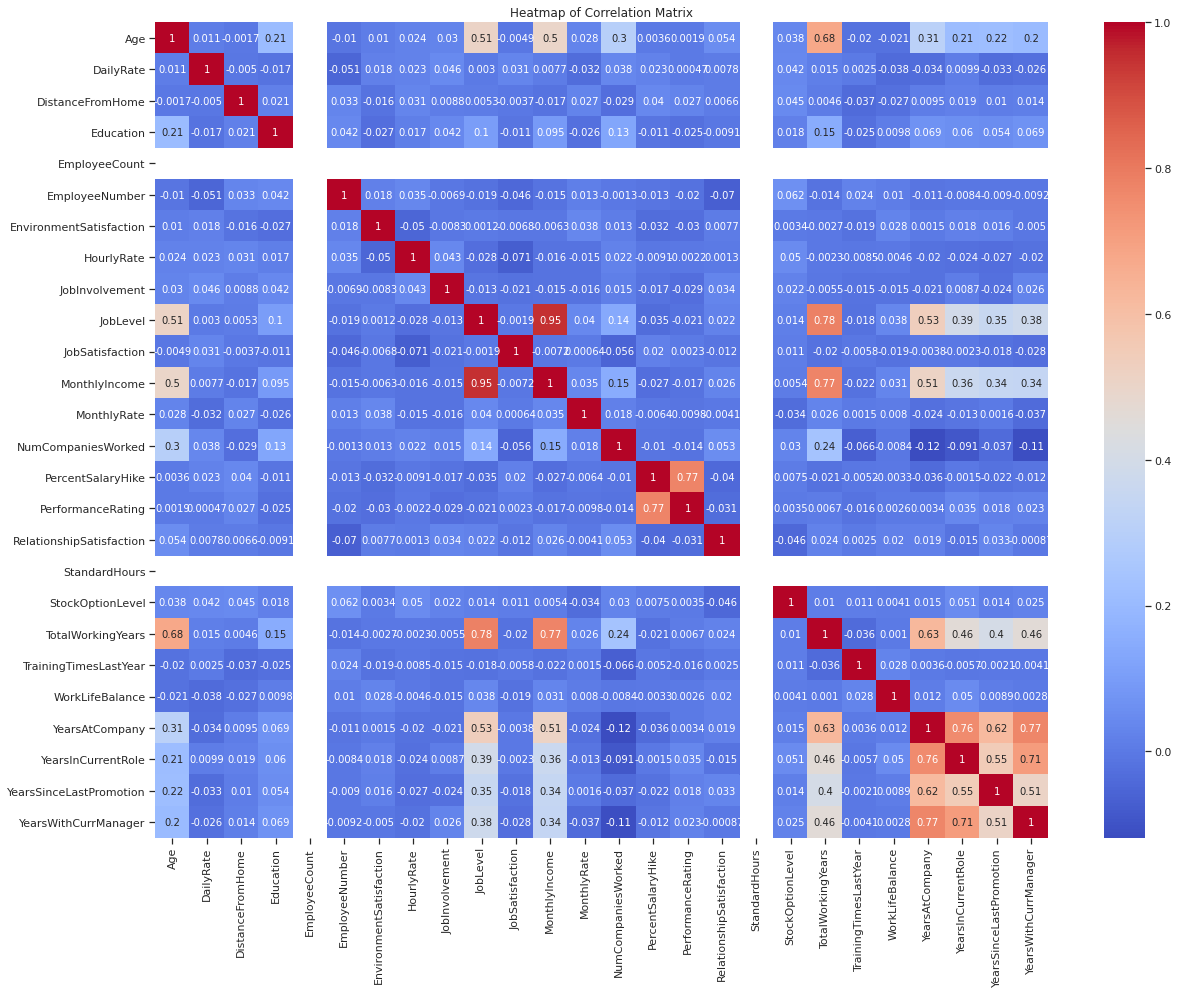

In [ ]:
# correlation matrix
cm = ibm.corr()
sns.set_style('ticks')
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')

Some features are highly correlated. Those will be removed later for modeling for possible model instability due to multicollinearity. 

In [ ]:
# Distribution

Text(0, 0.5, 'Count')

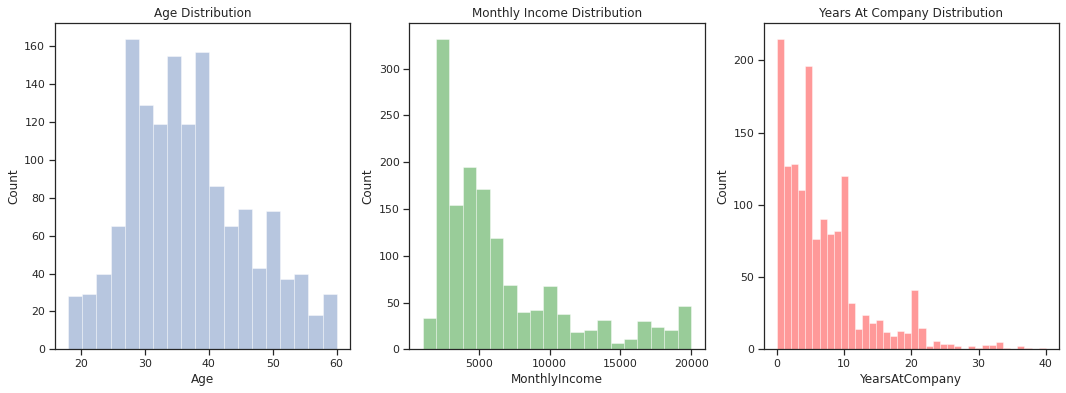

In [ ]:
# set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize = (18,6))
# age
sns.distplot(ibm['Age'], kde=False, ax = axes[0]).set_title('Age Distribution')
axes[0].set_ylabel('Count')
# monthly income
sns.distplot(ibm['MonthlyIncome'], kde=False, color = 'green', ax = axes[1]).set_title('Monthly Income Distribution')
axes[1].set_ylabel('Count')
# monthly income
sns.distplot(ibm['YearsAtCompany'], kde=False, color = 'red', ax = axes[2]).set_title('Years At Company Distribution')
axes[2].set_ylabel('Count')



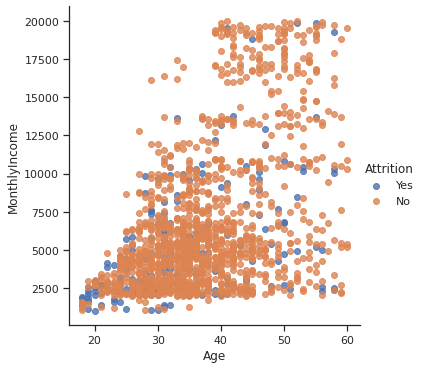

In [ ]:
# Monthly Income vs Years at Company
sns.lmplot(x='Age',y='MonthlyIncome', data = ibm, 
           fit_reg=False, hue = 'Attrition')


Generally, attrition is higher among employees who make less and early in career. 

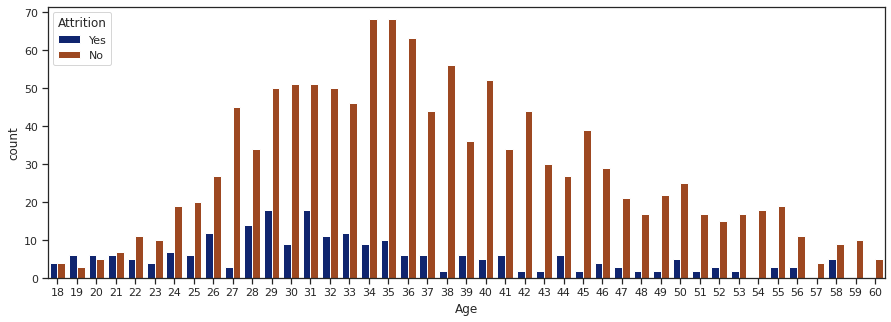

In [ ]:
# breakdown attrition by age
plt.subplots(figsize = (15,5))
sns.countplot(x='Age', hue = 'Attrition', data = ibm, palette='dark')

Attrition is high at age range 28-31.

Text(0.5, 1.0, 'Employee Age Distribution - Turnover V.S. No Turnover')

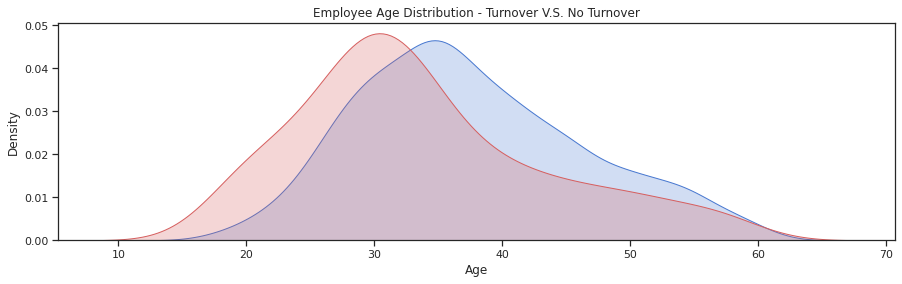

In [ ]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'No'),'Age'] , color='b',shade=True, label='Attrition')
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'Yes'),'Age'] , color='r',shade=True, label='No Attrition')
plt.title('Employee Age Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Job Satisfaction Distribution - Turnover V.S. No Turnover')

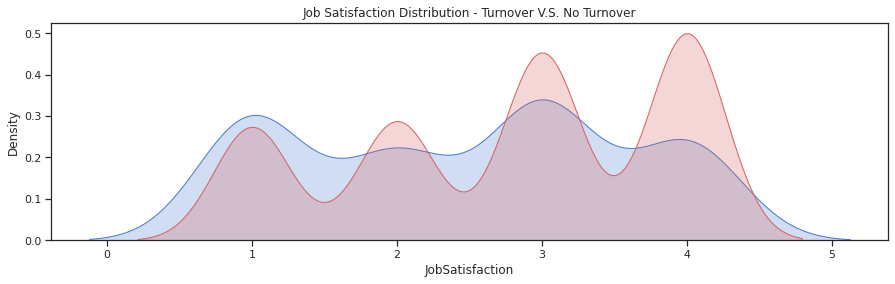

In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'Yes'),'JobSatisfaction'] , color='b',shade=True, label='Attrition')
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'No'),'JobSatisfaction'] , color='r',shade=True, label='No Attrition')
plt.title('Job Satisfaction Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Years at Company Distribution - Turnover V.S. No Turnover')

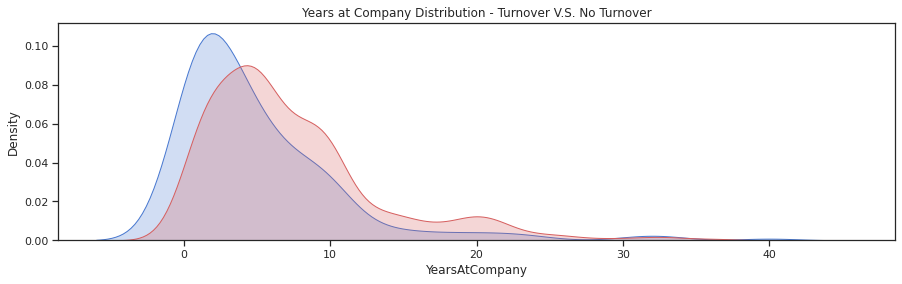

In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'Yes'),'YearsAtCompany'] , color='b',shade=True, label='Attrition')
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'No'),'YearsAtCompany'] , color='r',shade=True, label='No Attrition')
plt.title('Years at Company Distribution - Turnover V.S. No Turnover')

**Categorical Features**

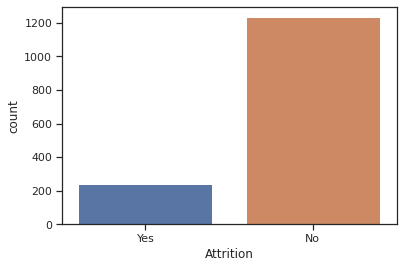

In [ ]:
# bar plot for attrition
sns.countplot(ibm['Attrition'])

In [ ]:
# attrition rate 
attr_rate = ibm.Attrition.value_counts()/1470
attr_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [ ]:
# check unique values for categorical variables
for var in ibm.columns:
  if ibm[var].dtype == object:
    print(str(var) + ':' + str(ibm[var].unique()))
    print(ibm[var].value_counts())
    print('------------------------------------------------------------------------------')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------------------------------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------------------------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------------------------------------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------------------------

In [ ]:
# attrition by departments
left = ibm[ibm['Attrition']=='Yes']
left = pd.DataFrame(left.Department.value_counts()).reset_index()
total = pd.DataFrame(ibm.Department.value_counts()).reset_index()
df_merge = pd.merge(left, total, how='inner', on='index')
df_merge = df_merge.rename(columns={"Department_x":'left', "Department_y":'total', "index":'Department' })
df_merge['stayed'] = df_merge['total']-df_merge['left']
df_merge

,Department,left,total,stayed
0,Research & Development,133,961,828
1,Sales,92,446,354
2,Human Resources,12,63,51


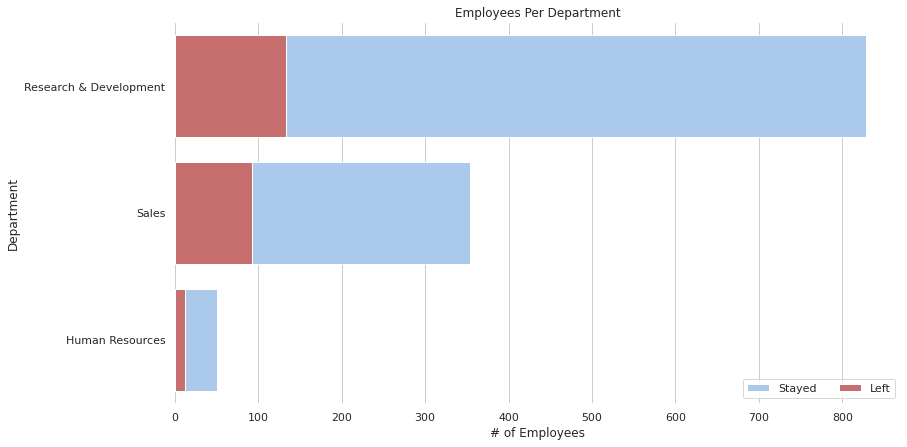

In [ ]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total employee per department
sns.set_color_codes("pastel")
sns.barplot(x="stayed", y='Department', data=df_merge,
            label="Stayed", color="b")

# Plot the total left per department
sns.set_color_codes("muted")
sns.barplot(x="left", y="Department", data=df_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

Sales have higher turnover by proportion(20%)

# Develop

## Engineer features


In [ ]:
ibm_new = ibm.drop(['StandardHours','EmployeeCount','EmployeeNumber', 'Over18', 'JobLevel','Gender','Education','PerformanceRating', 'RelationshipSatisfaction'], axis = 1)

In [ ]:
ibm_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,61,2,Research Scientist,2,Married,5130,24907,1,No,23,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,3,41,4,Laboratory Technician,4,Married,2571,12290,4,No,17,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,4,42,2,Healthcare Representative,1,Married,9991,21457,4,No,15,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2,87,4,Manufacturing Director,2,Married,6142,5174,1,Yes,20,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,4,63,2,Sales Executive,2,Married,5390,13243,2,No,14,0,17,3,2,9,6,0,8


In [ ]:
cat_dtype = ['Attrition','BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime']
num_dtype = ['Age',  'DailyRate','DistanceFromHome',  'EnvironmentSatisfaction','HourlyRate', 'JobInvolvement', 
        'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
num_ibm = ibm_new[num_dtype]
cat_ibm = pd.get_dummies(ibm_new[cat_dtype], drop_first=True) # drop_first to get k-1 dummies

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaled_features = sc.fit_transform(num_ibm)


In [ ]:

num_ibm = pd.DataFrame(scaled_features, index=num_ibm.index, columns=num_ibm.columns)


In [ ]:
ibm_new2 = pd.concat([num_ibm, cat_ibm], axis = 1)
ibm_new2 = ibm_new2.rename(columns={'Attrition_Yes':'Attrition'})
firstcol = ibm_new2['Attrition']
ibm_new2.drop(labels=['Attrition'], axis=1, inplace=True)
ibm_new2.insert(0,'Attrition',firstcol)
ibm_new2

,Attrition,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0.446350,0.742527,-1.010909,-0.660531,1.383138,0.379672,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1.322365,-1.297775,-0.147150,0.254625,-0.240677,-1.026167,-0.660853,-0.291719,1.488876,-0.678049,2.129306,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,0.008343,1.414363,-0.887515,1.169781,1.284725,-1.026167,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
3,0,-0.429664,1.461466,-0.764121,1.169781,-0.486709,0.379672,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,-1.086676,-0.524295,-0.887515,-1.575686,-1.274014,0.379672,-0.660853,-0.644858,0.325900,2.525591,-0.877232,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,-0.101159,0.202082,1.703764,0.254625,-1.224807,1.785511,1.153254,-0.835451,-0.284329,0.523316,0.489376,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1466,0,0.227347,-0.469754,-0.393938,1.169781,-1.175601,-1.026167,-1.567907,0.741140,1.004010,0.523316,-0.057267,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1467,0,-1.086676,-1.605183,-0.640727,-0.660531,1.038693,1.785511,-0.660853,-0.076690,-1.284418,-0.678049,1.309341,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1468,0,1.322365,0.546677,-0.887515,1.169781,-0.142264,-1.026167,-0.660853,-0.236474,-0.150393,-0.277594,-0.330589,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
ibm_new2.Attrition.value_counts()/1470

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [ ]:
y= ibm_new2['Attrition']
X = ibm_new2.drop(columns='Attrition')

In [ ]:
newdf = ibm_new2.iloc[:,1:] # X, independent variables 
newdf2 = ibm_new2.iloc[:,0] # target 

In [ ]:
# label encode vs one-hot encode 
# from sklearn.preprocessing import LabelEncoder

#for var in ibm.columns:
  #if ibm[var].dtype == np.number:
   # continue
  #ibm[var]= LabelEncoder().fit_transform(ibm[var]) # line if and ibm :) 

## Imbalanced Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Split the dataset into the Training and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 ) # drop attrition from ibm2
print("Training shape:",  X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Training shape: (1176, 39) (1176,)
Test shape: (294, 39) (294,)


In [ ]:
X_train

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1374,2.307882,-0.489587,1.456975,1.169781,0.300595,0.379672,1.153254,2.416322,-0.358675,0.523316,-0.603911,0.241988,2.278234,-0.620189,-1.077862,-0.981014,-1.167687,-0.679146,-1.155935,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1092,0.884358,0.365703,2.320735,1.169781,1.530758,0.379672,1.153254,-0.928730,-1.367197,0.523316,1.309341,0.241988,-0.421642,0.155707,0.338096,-0.327893,-0.063296,-0.679146,-0.314873,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
768,0.336849,-1.245713,2.073946,0.254625,0.399008,0.379672,-1.567907,0.402237,1.110821,-0.678049,-0.330589,0.241988,-0.421642,0.155707,-1.077862,-0.001333,0.764998,1.493867,0.245834,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
569,-0.101159,1.565588,-0.147150,-1.575686,0.497421,-1.026167,-1.567907,0.230341,-0.011820,-0.678049,-0.057267,-0.932014,-0.164511,-1.396086,0.338096,0.488508,0.764998,-0.679146,1.367249,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
911,-1.305679,-0.504462,1.827158,0.254625,0.349801,-2.432006,1.153254,-1.144183,-0.881628,-0.678049,-0.330589,-0.932014,-1.321601,0.931603,0.338096,-0.981014,-1.167687,-0.368715,-1.155935,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-0.320163,1.315199,0.099639,0.254625,1.038693,0.379672,0.246200,-0.910031,0.575782,-0.678049,1.036019,0.241988,-1.321601,-0.620189,0.338096,-0.981014,-0.891589,-0.679146,-1.155935,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
835,-0.210661,-0.680478,-0.147150,0.254625,1.678377,0.379672,0.246200,-0.463189,-1.012612,-0.678049,0.489376,-0.932014,-0.678774,-0.620189,-2.493820,-0.327893,-0.063296,-0.368715,-0.034520,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
1216,0.665354,0.933417,-0.887515,1.169781,0.349801,0.379672,1.153254,0.285586,-1.158634,-0.678049,0.489376,0.241988,-0.164511,0.155707,0.338096,0.488508,1.317193,1.804297,1.086895,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
559,0.117845,-1.325045,-0.887515,1.169781,1.284725,0.379672,0.246200,-0.732187,0.865437,1.324226,-0.603911,0.241988,-0.678774,-2.171982,-2.493820,-0.981014,-1.167687,-0.679146,-0.875581,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1


## Feature Scaling

## Baseline Models with Original Sample

**Logistic Regression**

In [ ]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy = %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred)) # hide warning 
cvscore = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
cvscore.mean()

Accuracy = 0.88
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       245
           1       0.72      0.47      0.57        49

    accuracy                           0.88       294
   macro avg       0.81      0.72      0.75       294
weighted avg       0.87      0.88      0.87       294



0.5198524087997772

**Random Forest**

In [ ]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy= %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))
cvscore = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
cvscore.mean()

Accuracy= 0.86
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       245
           1       0.82      0.18      0.30        49

    accuracy                           0.86       294
   macro avg       0.84      0.59      0.61       294
weighted avg       0.85      0.86      0.82       294



0.22181271767217167

**KNN**

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy = %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))

Accuracy = 0.85
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       245
           1       0.78      0.14      0.24        49

    accuracy                           0.85       294
   macro avg       0.82      0.57      0.58       294
weighted avg       0.84      0.85      0.80       294



**Decision Tree**

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy = %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))

Accuracy = 0.75
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       245
           1       0.28      0.33      0.30        49

    accuracy                           0.75       294
   macro avg       0.57      0.58      0.57       294
weighted avg       0.76      0.75      0.76       294



**Naive Bayes**

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy=%2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))

Accuracy=0.67
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       245
           1       0.29      0.67      0.40        49

    accuracy                           0.67       294
   macro avg       0.60      0.67      0.59       294
weighted avg       0.81      0.67      0.71       294



**Support Vector Machine**

In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy=%2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))

Accuracy=0.85
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       245
           1       0.73      0.16      0.27        49

    accuracy                           0.85       294
   macro avg       0.79      0.58      0.59       294
weighted avg       0.83      0.85      0.81       294



## Treating Imabalanced Dataset
Using oversampling with SMOTE(Synthetic Minority Oversampling Technique). It uses nearest neighbors of the minority records to create new synthetic data

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smotesampler = SMOTE(random_state=0, ratio=1.0)
X_train_smote, y_train_smote = smotesampler.fit_sample(X_train,y_train)
print("SMOTE Training sample:", X_train_smote.shape, y_train_smote.shape)
print("Original Training sample:",  X_train.shape, y_train.shape)

SMOTE Training sample: (1976, 39) (1976,)
Original Training sample: (1176, 39) (1176,)


## Models with SMOTE data


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [ ]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train_smote, y_train_smote)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cvscore = cross_val_score(log_reg, X_train_smote, y_train_smote, cv=5, scoring='f1')
cvscore.mean()
log_reg_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print("Logistic Regression AUC = %2.2f" % log_reg_auc)

0.7721088435374149
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       245
           1       0.40      0.78      0.53        49

    accuracy                           0.77       294
   macro avg       0.67      0.77      0.69       294
weighted avg       0.85      0.77      0.80       294

Logistic Regression AUC = 0.77


In [ ]:
rand_fr = RandomForestClassifier(random_state=0)
rand_fr.fit(X_train_smote, y_train_smote)
y_pred = rand_fr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cvscore = cross_val_score(rand_fr, X_train_smote, y_train_smote, cv=5, scoring='f1')
cvscore.mean()
rand_fr_auc = roc_auc_score(y_test, rand_fr.predict(X_test))
print("Random Forest AUC = %2.2f" % rand_fr_auc) # doesn't do well with scaled data

0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.67      0.33      0.44        49

    accuracy                           0.86       294
   macro avg       0.77      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

Random Forest AUC = 0.65


In [ ]:
naive_bay = GaussianNB()
naive_bay.fit(X_train_smote, y_train_smote)
y_pred = naive_bay.predict(X_test)
print("%2.2f"% accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cvscore = cross_val_score(naive_bay, X_train_smote, y_train_smote, cv=5, scoring='f1')
cvscore.mean()
naive_bay_auc = roc_auc_score(y_test, naive_bay.predict(X_test))
print("Naive Bays AUC = %2.2f" % naive_bay_auc)

0.53
              precision    recall  f1-score   support

           0       0.92      0.49      0.63       245
           1       0.23      0.78      0.36        49

    accuracy                           0.53       294
   macro avg       0.57      0.63      0.50       294
weighted avg       0.80      0.53      0.59       294

Naive Bays AUC = 0.63


In [ ]:
# F1-score for minor class  improved with smote


## Downsample

In [ ]:
from sklearn.utils import resample

In [ ]:
X_train_down, y_train_down = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=0)
X_train_down = np.concatenate((X_train[y_train == 0], X_train_down))
y_train_down = np.concatenate((y_train[y_train == 0], y_train_down))
print("Downsampled size:", X_train_down.shape, y_train_down.shape)

Downsampled size: (1976, 39) (1976,)


In [ ]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_down, y_train_down)
y_pred = classifier.predict(X_test)
print("Accuracy = %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))

Accuracy = 0.77
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       245
           1       0.40      0.78      0.53        49

    accuracy                           0.77       294
   macro avg       0.67      0.77      0.69       294
weighted avg       0.85      0.77      0.79       294



In [ ]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train_down, y_train_down)
y_pred = classifier.predict(X_test)
print("Accuracy= %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))

Accuracy= 0.87
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       245
           1       0.88      0.29      0.43        49

    accuracy                           0.87       294
   macro avg       0.87      0.64      0.68       294
weighted avg       0.87      0.87      0.85       294



In [ ]:
classifier = GaussianNB()
classifier.fit(X_train_down, y_train_down)
y_pred = classifier.predict(X_test)
print("%2.2f"% accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.56
              precision    recall  f1-score   support

           0       0.91      0.53      0.67       245
           1       0.24      0.76      0.37        49

    accuracy                           0.56       294
   macro avg       0.58      0.64      0.52       294
weighted avg       0.80      0.56      0.62       294



## Upsample

In [ ]:
# upsample records with attrition, minority class
from sklearn.utils import resample
X_train_up, y_train_up = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=0)

X_train_up = np.concatenate((X_train[y_train == 1], X_train_up))
y_train_up = np.concatenate((y_train[y_train == 1], y_train_up))
print("Upsampled size:", X_train_up.shape, y_train_up.shape)

Upsampled size: (376, 39) (376,)


In [ ]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_up, y_train_up)
y_pred = classifier.predict(X_test)
print("Accuracy = %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))

Accuracy = 0.76
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       245
           1       0.39      0.78      0.52        49

    accuracy                           0.76       294
   macro avg       0.67      0.77      0.68       294
weighted avg       0.85      0.76      0.79       294



In [ ]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train_up, y_train_up)
y_pred = classifier.predict(X_test)
print("Accuracy= %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))

Accuracy= 0.75
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       245
           1       0.36      0.63      0.46        49

    accuracy                           0.75       294
   macro avg       0.64      0.70      0.65       294
weighted avg       0.82      0.75      0.78       294



In [ ]:
classifier = GaussianNB()
classifier.fit(X_train_up, y_train_up)
y_pred = classifier.predict(X_test)
print("%2.2f"% accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.56
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       245
           1       0.24      0.78      0.37        49

    accuracy                           0.56       294
   macro avg       0.58      0.65      0.52       294
weighted avg       0.81      0.56      0.61       294



In [ ]:
# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_up, y_train_up),
                "SMOTE":(X_train_smote, y_train_smote),
                "Downsampled":(X_train_down, y_train_down)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())

The best F1 Score for Original data:
0.5198524087997772
The best F1 Score for Upsampled data:
0.7177482664324769
The best F1 Score for SMOTE data:
0.7942797822895535
The best F1 Score for Downsampled data:
0.7825682280064464


## Feature Selection

First let's remove, variables that lacks variability and that are highly correlated.Multi collinearity leads to an inflated variance and increase error. The job level is highly correlated with MonthlyIncome and TotalWorkingYears.

Should I try Chi-Square test to see if attrition is independent of other categorical variables?

H0: Two variables are independent/no association

H1: Dependent/association

at 5%

In [ ]:
from scipy.stats import chi2_contingency


In [ ]:
contingency = pd.crosstab(ibm['Attrition'], ibm['Gender'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(p)

0.29057244902890855


In [ ]:
contingency = pd.crosstab(ibm['Attrition'], ibm['Education'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(p)

0.5455253376565949


In [ ]:
contingency = pd.crosstab(ibm['Attrition'], ibm['PerformanceRating'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(p)

0.9900745465934576


In [ ]:
contingency = pd.crosstab(ibm['Attrition'], ibm['RelationshipSatisfaction'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(p)

0.15497244371052626


We fail to reject null hypothesis at 95% level of confidence. Therefore, Gender, Education, PerformanceRating can be dropped. 

In [ ]:
ibm_new = ibm.drop(['StandardHours','EmployeeCount','EmployeeNumber', 'Over18', 'JobLevel','Gender','Education','PerformanceRating', 'RelationshipSatisfaction'], axis = 1)

In [ ]:
ibm_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,61,2,Research Scientist,2,Married,5130,24907,1,No,23,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,3,41,4,Laboratory Technician,4,Married,2571,12290,4,No,17,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,4,42,2,Healthcare Representative,1,Married,9991,21457,4,No,15,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2,87,4,Manufacturing Director,2,Married,6142,5174,1,Yes,20,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,4,63,2,Sales Executive,2,Married,5390,13243,2,No,14,0,17,3,2,9,6,0,8


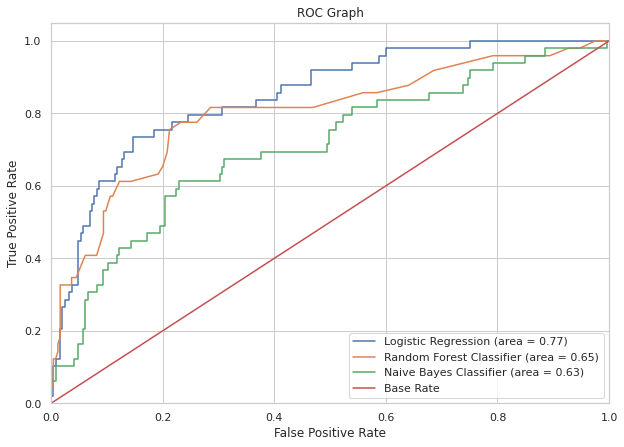

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rand_fr.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, naive_bay.predict_proba(X_test)[:,1])


plt.figure(figsize=(10,7))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_reg_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rand_fr_auc)

# Plot Naive Bayes AUV
plt.plot(gbc_fpr, gbc_tpr, label='Naive Bayes Classifier (area = %0.2f)' % naive_bay_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()